In [2]:
import unicodecsv
    
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
enrollments = read_csv('./enrollments.csv')
daily_engagement = read_csv('./daily_engagement.csv')
project_submissions = read_csv('./project_submissions.csv')


In [3]:
from datetime import datetime as dt

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date,'%Y-%m-%d')
    
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)
    
def parse_boolean(string):
    if string == 'True':
        return True
    elif string == 'False':
        return False
    else:
        return None

In [4]:
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = parse_boolean(enrollment['is_canceled'])
    enrollment['is_udacity'] = parse_boolean(enrollment['is_udacity'])
    enrollment['join_date'] = parse_date(enrollment['join_date'])

In [5]:
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = int(float(engagement_record['total_minutes_visited']))
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])

In [74]:
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

TypeError: strptime() argument 1 must be string, not datetime.datetime

In [75]:
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [76]:
daily_engagement[0]

{'account_key': u'0',
 'has_visited': 1,
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [77]:
project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [78]:
for entry in daily_engagement:
    entry['account_key'] = entry['acct']
    del entry['acct']

KeyError: 'acct'

In [79]:
def set_of_unique_students(dictionary):
    result = set()
    for listing in dictionary:
        result.add(listing['account_key'])
    return result

In [80]:
print "Number of rows in enrollments:", len(enrollments)
print "Number of acct keys in enrollments:", len(set_of_unique_students(enrollments))

Number of rows in enrollments: 1640
Number of acct keys in enrollments: 1302


In [81]:
print "Number of rows in project submissions:", len(project_submissions)
print "Number of acct keys in project submissions:", len(set_of_unique_students(project_submissions))

Number of rows in project submissions: 3642
Number of acct keys in project submissions: 743


In [82]:
print "Number of rows in daily engagement:", len(daily_engagement)
print "Number of acct keys in daily engagement:", len(set_of_unique_students(daily_engagement))

Number of rows in daily engagement: 136240
Number of acct keys in daily engagement: 1237


In [83]:
daily_engagement[0]

{'account_key': u'0',
 'has_visited': 1,
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [84]:
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [85]:
examples = [1145,817,737,717,711,914,1069, 1010,1025]

In [86]:
for entry in enrollments:
    if entry['account_key'] == "717":
        print entry

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 12, 4, 0, 0), u'account_key': u'717', u'cancel_date': datetime.datetime(2014, 12, 4, 0, 0), u'days_to_cancel': 0}


In [87]:
for entry in daily_engagement:
    if entry['account_key'] == '1140':
        print entry

{u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 7, u'projects_completed': 0, 'account_key': u'1140', u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 92, u'projects_completed': 0, 'account_key': u'1140', u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 30, u'projects_completed': 0, 'account_key': u'1140', u'utc_date': datetime.datetime(2015, 1, 12, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 0, 'has_visited': 0, u'total_minutes_visited': 0, u'projects_completed': 0, 'account_key': u'1140', u'utc_date': datetime.datetime(2015, 1, 13, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 0, 'has_visited': 0, u'total_minutes_visited': 0, u'projects_completed': 0, 'account_key': u'1140', u'utc_date': datetime.datetime(2015, 1, 14, 

In [88]:
unmatched = (set_of_unique_students(enrollments) ^ set_of_unique_students(daily_engagement))

In [89]:
print unmatched

set([u'737', u'902', u'1213', u'749', u'1191', u'1171', u'1270', u'1284', u'1304', u'1086', u'884', u'889', u'1044', u'1148', u'664', u'1010', u'1238', u'964', u'968', u'1241', u'878', u'875', u'870', u'871', u'1155', u'803', u'802', u'766', u'1079', u'1145', u'819', u'817', u'717', u'711', u'1069', u'1063', u'1129', u'1120', u'1125', u'1237', u'1190', u'707', u'799', u'1222', u'654', u'997', u'996', u'926', u'789', u'1025', u'1273', u'1101', u'981', u'914', u'841', u'733', u'750', u'739', u'1186', u'727', u'725', u'728', u'1291', u'1218', u'1219'])


In [90]:
result = []
for entry in enrollments:
    for code in unmatched:
        if code == entry['account_key']:
            result.append(entry)
for listing in result:
    if listing['days_to_cancel'] != 0:
        print "%r \n\n" % (listing)

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59} 


{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99} 


{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None} 




In [91]:
len(result)

71

In [92]:
udacity_test_accts = set()
for entry in enrollments:
    if entry['is_udacity'] == True:
        udacity_test_accts.add(entry['account_key'])
len(udacity_test_accts)

6

In [93]:
def remove_test_accts(data):
    not_test_accts = []
    for entry in data:
        if entry['account_key'] not in udacity_test_accts:
            not_test_accts.append(entry)
    return not_test_accts

In [94]:
non_u_enrollments = remove_test_accts(enrollments)
non_u_engagement = remove_test_accts(daily_engagement)
non_u_project_submissions = remove_test_accts(project_submissions)

print len(non_u_enrollments)
print len(non_u_engagement)
print len(non_u_project_submissions)

1622
135656
3634


In [95]:
len(set_of_unique_students(non_u_enrollments))

1296

In [28]:
paid_students = {}

for entry in non_u_enrollments:
    if entry['days_to_cancel'] == None or entry['days_to_cancel'] > 7:
        account_key = entry['account_key']
        enrollment_date = entry['join_date']
        
        if account_key not in paid_students or \
                enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date
    
len(paid_students)

995

### Seven Days ###

Create a list of rows from the engagement table including only rows
where the student is one of the paid students, and the
date is within one week of the student's join date.

In [29]:
def within_one_week(join_date, engagement_date):
    """
    function that takes a student's join date and the date of a 
    specific engagement record and returns True if that engagement record
    happened within one week of the student's joining.
    """
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [30]:
def remove_free_trial_cancels(data):
    new_data = []
    for entry in data:
        if entry['account_key'] in paid_students:
            new_data.append(entry)
    return new_data

In [31]:
paid_engagement = remove_free_trial_cancels(non_u_engagement)
paid_enrollments = remove_free_trial_cancels(non_u_enrollments)
paid_project_submissions = remove_free_trial_cancels(non_u_project_submissions)

print len(paid_engagement)
print len(paid_enrollments)
print len(paid_project_submissions)

134549
1293
3618


In [32]:
print paid_engagement[5]

{u'lessons_completed': 1, u'num_courses_visited': 1, u'total_minutes_visited': 151, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 14, 0, 0)}


In [33]:
paid_engagement_in_first_week = []

for entry in paid_engagement:
    acct_key = entry['account_key']
    join_date = paid_students[acct_key]
    engagement_date = entry['utc_date']
    if within_one_week(join_date, engagement_date):
            paid_engagement_in_first_week.append(entry)

len(paid_engagement_in_first_week)

6919

In [34]:
# grouping data by student to analyze engagement during the first week (in mins)

In [35]:
from collections import defaultdict

In [36]:
def group_data(data_source, group_by_field):
    output = defaultdict(list)
    for entry in data_source:
        group = entry[str(group_by_field)]
        output[group].append(entry)
    return output

# engagement_by_acct_key = defaultdict(list)
# for entry in paid_engagement_in_first_week:
#     acct_key = entry['account_key']
#     engagement_by_acct_key[acct_key].append(entry)

In [37]:
engagement_by_acct_key = group_data(paid_engagement_in_first_week, 'account_key')
print len(engagement_by_acct_key)

995


In [38]:
def calculate_grouped_list(data_source, key_name):
    totals_by_student = {}
    for key, grouped_data in data_source.items():
        current_sum = 0.0
        for entry in grouped_data:
            current_sum += entry[key_name]
        totals_by_student[key] = current_sum
    return totals_by_student

In [39]:
# calculates each student's total min visited and stores just the acct_key and total_min to a dict
total_minutes = calculate_grouped_list(engagement_by_acct_key, 'total_minutes_visited')

In [40]:
import numpy as np

In [41]:
def print_some_stats(list_of_values):
    print "Mean:", np.mean(list_of_values)
    print "Standard Dev:", np.std(list_of_values)
    print "Maximum:", np.max(list_of_values)
    print "Minimum:", np.min(list_of_values)

In [42]:
print_some_stats(total_minutes.values())

Mean: 305.285427136
Standard Dev: 412.107180939
Maximum: 3562.0
Minimum: 0.0


In [43]:
# for entry in paid_engagement_in_first_week:
#     if entry['account_key'] == '108':
#         print entry
# for entry in paid_enrollments:
#     if entry['account_key'] == '108':
#         print entry

In [44]:
lesson_totals_by_student = calculate_grouped_list(engagement_by_acct_key, 'lessons_completed')

len(lesson_totals_by_student)

995

In [45]:
print_some_stats(lesson_totals_by_student.values())

Mean: 1.63618090452
Standard Dev: 3.00256129983
Maximum: 36.0
Minimum: 0.0


In [46]:
courses_visited_by_student = calculate_grouped_list(engagement_by_acct_key, 'num_courses_visited')

In [47]:
print_some_stats(courses_visited_by_student.values())

Mean: 3.97889447236
Standard Dev: 3.5912451871
Maximum: 25.0
Minimum: 0.0


In [48]:
paid_engagement_in_first_week[5]

{'account_key': u'0',
 u'lessons_completed': 1,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 151,
 u'utc_date': datetime.datetime(2015, 1, 14, 0, 0)}

In [49]:
print engagement_by_acct_key['5']

[{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 59, u'projects_completed': 0, 'account_key': u'5', u'utc_date': datetime.datetime(2015, 1, 7, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0, u'projects_completed': 0, 'account_key': u'5', u'utc_date': datetime.datetime(2015, 1, 8, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 103, u'projects_completed': 0, 'account_key': u'5', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 80, u'projects_completed': 0, 'account_key': u'5', u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 36, u'projects_completed': 0, 'account_key': u'5', u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 50, u'project

In [50]:
engage_by_key = group_data(paid_engagement_in_first_week, 'account_key')

def add_visit_score(data_source):
    for entry in data_source:
        for record in data_source[entry]:
            if record['num_courses_visited'] > 0:
                record['has_visited'] = 1
            else:
                record['has_visited'] = 0

In [51]:
# this only adds the score to the data created from the first week. 
# BEWARE!! May want to analyze all engagement, and will need to 
# rerun the add_visit_score on the engagement table from an earlier cell.
# Lesson #20 explains the potential probs here.

add_visit_score(engage_by_key)

In [52]:
engage_by_key['5']

[{'account_key': u'5',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'projects_completed': 0,
  u'total_minutes_visited': 59,
  u'utc_date': datetime.datetime(2015, 1, 7, 0, 0)},
 {'account_key': u'5',
  'has_visited': 0,
  u'lessons_completed': 0,
  u'num_courses_visited': 0,
  u'projects_completed': 0,
  u'total_minutes_visited': 0,
  u'utc_date': datetime.datetime(2015, 1, 8, 0, 0)},
 {'account_key': u'5',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 2,
  u'projects_completed': 0,
  u'total_minutes_visited': 103,
  u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)},
 {'account_key': u'5',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'projects_completed': 0,
  u'total_minutes_visited': 80,
  u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)},
 {'account_key': u'5',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'projects_completed': 0,
  u'total_minutes_visite

In [53]:
number_of_days_visited = calculate_grouped_list(engage_by_key, 'has_visited')

In [54]:
print_some_stats(number_of_days_visited.values())

Mean: 2.86733668342
Standard Dev: 2.25519800292
Maximum: 7.0
Minimum: 0.0


#### 11 ####
Create two lists of engagement data for paid students in the first week.

The first list should contain data for students who eventually pass the subway project,
and the second list should contain data for students who do not.

In [55]:
# ratings are as follows:
# blank (not evaluated)
# INCOMPLETE (fail)
# PASSED (obvs)
# DISTINCTION (passed with flying colors)
# UNGRADED (couldn't be opened-- not evaluated)

In [56]:
subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for entry in paid_project_submissions:
    project = entry['lesson_key']
    rating = entry['assigned_rating']
    
    if project in subway_project_lesson_keys and\
        (rating == 'PASSED' or rating == 'DISTINCTION'):
            pass_subway_project.add(entry['account_key'])

print len(pass_subway_project)

passing_engagement = []
non_passing_engagement = []

647


In [57]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)


In [58]:
print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


In [59]:
passing_engagement_by_key = group_data(passing_engagement, 'account_key')
non_passing_engagement_by_key = group_data(non_passing_engagement, 'account_key')

In [60]:
passing_minutes = calculate_grouped_list(passing_engagement_by_key, 'total_minutes_visited')
passing_lessons = calculate_grouped_list(passing_engagement_by_key, 'lessons_completed')
passing_days = calculate_grouped_list(passing_engagement_by_key, 'has_visited')

In [61]:
non_passing_minutes = calculate_grouped_list(non_passing_engagement_by_key, 'total_minutes_visited')
non_passing_lessons = calculate_grouped_list(non_passing_engagement_by_key, 'lessons_completed')
non_passing_days = calculate_grouped_list(non_passing_engagement_by_key, 'has_visited')

In [62]:
print "Passing minutes:\n", print_some_stats(passing_minutes.values())
print "\nFailing minutes:\n", print_some_stats(non_passing_minutes.values())

Passing minutes:
Mean: 392.904173107
Standard Dev: 447.62221192
Maximum: 3562.0
Minimum: 0.0
None

Failing minutes:
Mean: 142.385057471
Standard Dev: 268.80340636
Maximum: 1765.0
Minimum: 0.0
None


In [63]:
print "Passing lessons:\n", print_some_stats(passing_lessons.values())
print "\nFailing lessons:\n", print_some_stats(non_passing_lessons.values())

Passing lessons:
Mean: 2.05255023184
Standard Dev: 3.14222705558
Maximum: 36.0
Minimum: 0.0
None

Failing lessons:
Mean: 0.862068965517
Standard Dev: 2.54915994183
Maximum: 27.0
Minimum: 0.0
None


In [64]:
print "Passing days visited:\n", print_some_stats(passing_days.values())
print "\nFailing days visited:\n", print_some_stats(non_passing_days.values())

Passing days visited:
Mean: 3.38485316847
Standard Dev: 2.25882147092
Maximum: 7.0
Minimum: 0.0
None

Failing days visited:
Mean: 1.90517241379
Standard Dev: 1.90573144136
Maximum: 7.0
Minimum: 0.0
None


In [65]:
%matplotlib inline
import matplotlib.pyplot as plt

In [66]:
hist = {"Passing Minutes": passing_minutes.values(),
       "Failing Minutes": non_passing_minutes.values(),
       "Passing Days": passing_days.values(),
       "Failing Days": non_passing_days.values(),
       "Passing Lessons": passing_lessons.values(),
       "Failing Lessons": non_passing_lessons.values()}

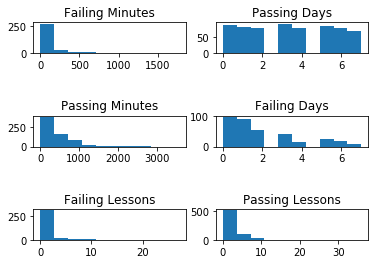

In [67]:
fig, axs = plt.subplots(3,2)
for axs, (name, data_set) in zip(axs.flatten(), hist.iteritems()):
    axs.hist(data_set)
    axs.set_title(name)

plt.subplots_adjust(hspace=2)

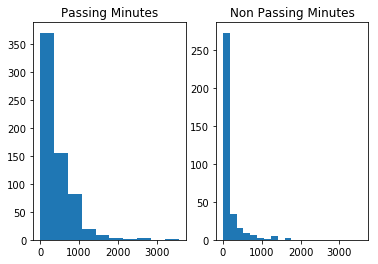

In [71]:
fig, (axs1, axs2) = plt.subplots(1,2, sharex= True)
axs1.hist(passing_minutes.values())
axs1.set_title("Passing Minutes")
axs2.hist(non_passing_minutes.values())
axs2.set_title("Non Passing Minutes")

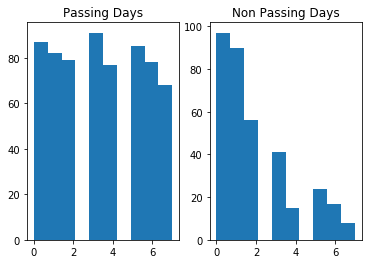

In [72]:
fig, (axs1, axs2) = plt.subplots(1,2, sharex= True)
axs1.hist(passing_days.values())
axs1.set_title("Passing Days")
axs2.hist(non_passing_days.values())
axs2.set_title("Non Passing Days")

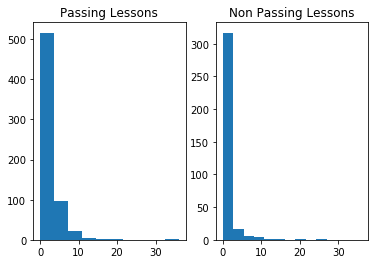

In [73]:
fig, (axs1, axs2) = plt.subplots(1,2, sharex= True)
axs1.hist(passing_lessons.values())
axs1.set_title("Passing Lessons")
axs2.hist(non_passing_lessons.values())
axs2.set_title("Non Passing Lessons")